In [ ]:
import torch

In [ ]:
a = torch.randn(4) # Случайные значения из стандартного нормального распределения (среднее значение 0, отклонение 1)
b = torch.rand(4)  # Случайные числа из равномерного распределния на интервале от 0 до 1
print('a= ', a, a.size())
print('b= ', b, b.size())

c = torch.randint(2,4,(4,4)) # Гнерирует тензор с произвольными целочисленными значениями в заданном диапазоне
print('c= ', c)

a=  tensor([-1.0600,  0.3108, -0.0066,  1.0185]) torch.Size([4])
b=  tensor([0.6630, 0.2155, 0.8348, 0.2902]) torch.Size([4])
c=  tensor([[2, 2, 3, 2],
        [3, 2, 2, 3],
        [2, 2, 3, 2],
        [2, 3, 3, 2]])


In [ ]:
c = torch.matmul(a,b)
print('c= ', c, c.size()) # Умножение двух тензоров (матриц) друг на друга. (Скалярное произведение)
z = a*b
print('z= ', z)
zz = torch.mv(a.view(1, -1), b) # Умножения матрицы на вектор. Она принимает два аргумента: матрицу размером (M, N) и вектор размером (N), и возвращает новый вектор размером (M).
print('zz= ', zz, zz.size()) # view Изменять размер и форму тензора без изменения его данных.
x = torch.mm(a.view(1, -1), b.view(-1, 1)) # Умножения матриц. Она принимает два аргумента: матрицу А размером (n × m) и матрицу B размером (m × p), и возвращает произведение этих двух матриц - матрицу C размером (n × p).
print('x= ', x, zz.size())
# torch.mv
# torch.mm
# @

c=  tensor(-0.3457) torch.Size([])
z=  tensor([-0.7027,  0.0670, -0.0055,  0.2956])
zz=  tensor([-0.3457]) torch.Size([1])
x=  tensor([[-0.3457]]) torch.Size([1])


In [ ]:
print(c.size())
c = torch.unsqueeze(c, 0) # Изменение размерности тензора в указанную размерность. Она добавляет единичное измерение к указанной позиции в тензоре. 0 - где добавить
print(c.size())

torch.Size([])
torch.Size([1])


## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    # <создать атрибуты объекта weights и bias>
    self.weights = weights
    self.bias = bias
    pass

  def forward(self, inputs):
    # y_pred = self.weights @ inputs + self.bias Вариант 1
    y_pred = torch.mv(self.weights.view(1, -1), inputs) + self.bias # Вариант 2
    return y_pred # <реализовать логику нейрона> w*x+b

In [ ]:
a = torch.arange(1, 16, 1)
print(a)
a = a.view(5,-1) # 5 - Строка
print(a)
a = a.view(3,-1) # 5 - Строка
print(a)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]])


In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
N = Neuron(weights, bias)
y = N.forward(inputs)
y

tensor([4.8400])

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
  def __init__(self, weights, biases):
    # <создать атрибуты объекта weights и biases>
    self.weights = weights
    self.biases = biases
    pass

  def forward(self, inputs):
    # y_pred = torch.mv(self.weights.reshape(3, -1), inputs) + self.biases
    y_pred = self.weights @ inputs + self.biases
    return y_pred # <реализовать логику нейрона> w*x+b

  # Если несколько нейронов на выходе вектор. Если один на выходе число.

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])

In [ ]:
l = Linear(weights, biases)
y = l.forward(inputs)
y

tensor([ 4.8400,  0.1700, 10.3900])

In [ ]:
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])
weights.T

tensor([[-0.2000,  0.5000, -0.2600],
        [ 0.3000, -0.9100, -0.2700],
        [-0.5000,  0.2600,  0.1700],
        [ 0.7000, -0.5000,  0.8700]])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
l = Linear(weights, biases)
y = l.forward(inputs.T)
y

tensor([[ 3.7900,  5.7100,  6.1000],
        [ 1.3500, -2.1000,  5.2510],
        [ 5.0250,  2.4100,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
# ДЗ
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.randn(n_neurons)


  def forward(self, inputs):
    return (inputs @ self.weights) + self.biases  # torch.matmul(inputs, self.weights) + self.biases
    # <реализовать логику слоя>

In [ ]:
weights = torch.randn(4, 3)
weights

tensor([[-1.9634, -0.3814,  0.9885],
        [-0.7681,  0.2665, -0.6579],
        [ 0.5540,  0.1206,  0.8375],
        [ 0.8501, -1.6680,  2.7639]])

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
inputs @ weights

tensor([[ 0.2877, -3.6566,  9.0949],
        [-6.6211, -2.8872,  3.3779],
        [ 2.0192,  3.0242, -2.7065]])

In [ ]:
l = Linear(n_features = 4, n_neurons = 3)
l.forward(inputs)

tensor([[ 3.3252,  1.4471,  0.7576],
        [ 6.4538, -3.8242,  0.3739],
        [ 3.4393,  3.9252,  0.4433]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
step_1 = Linear(n_features = 4, n_neurons = 7) # количество нейронов 7
step_2 = Linear(n_features = 7, n_neurons = 7)
step_2.forward(step_1.forward(inputs))

tensor([[-33.0315,   9.3000,  -4.2675,  -2.1867,  18.6437,  -6.6033,  -7.0808],
        [-10.0871,  -4.3243,   5.0200,  -6.3354,  14.8344,  10.3563,  13.3178],
        [-12.5580,   1.6342,  -5.1224,  -8.1789,   9.8571,   3.5508,  -2.9432]])

## 2.2 Создание функций активации

**Слои активации** - это один из основных типов слоев, которые используются в нейронных сетях. Они представляют собой функцию, которая **добавляет нелинейность к выходу предыдущего слоя**. Это **позволяет нейронной сети лучше моделировать сложные функции и более точно предсказывать результаты.**

*Как работают слои активации?*

Слои активации принимают на вход результаты предыдущего слоя, называемые входом, и преобразуют их в выходное значение, которое передается следующему слою. Для этого они используют функцию активации, которая определяет, каким образом данные будут преобразованы.

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

**ReLU (Rectified Linear Unit)** - это нелинейная функция активации, которая широко используется в глубоком обучении. Она преобразует входное значение в значение от 0 до положительной бесконечности. Если входное значение меньше или равно нулю, то ReLU выдает ноль, в противном случае - входное значение.

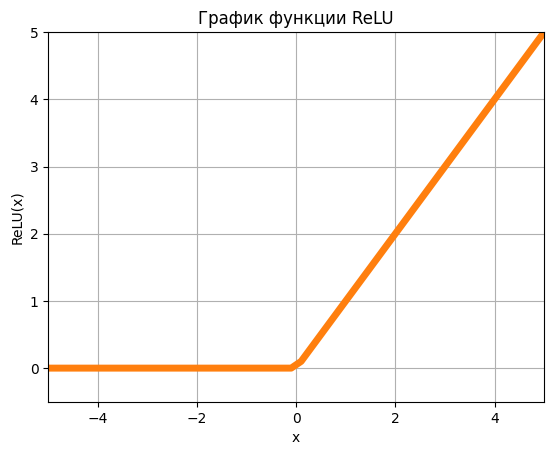

In [ ]:
x = torch.randn(4,3)
print('x= ', x)

x=  tensor([[-2.2787, -0.1235,  0.1210],
        [ 0.3449, -0.9813, -1.1582],
        [-0.6739, -1.5102,  1.2631],
        [ 0.1296,  1.3367,  0.1832]])


In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    res = torch.where(inputs>0, inputs, 0) # возвращает новый тензор, наполненный значениями из двух заданных тензоров, в зависимости от условия.
                                           # Синтаксис функции:
                                           # torch.where(condition, x, y)
    return res

In [ ]:
r = ReLU()
r.forward(inputs)

tensor([[1.0000, 2.0000, 3.0000, 2.5000],
        [2.0000, 5.0000, 0.0000, 2.0000],
        [0.0000, 2.7000, 3.3000, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

**Функция Softmax** используется для преобразования вектора значений в вероятностное распределение, которое суммируется до 1. Она особенно полезна в многоклассовой классификации, где необходимо определить вероятности для каждого класса.


График функции Softmax представляет собой **гладкую кривую, начинающуюся от 0 и заканчивающуюся на 1, что соответствует сумме вероятностей всех элементов вектора**. Кривая функции Softmax имеет свойство, что вероятность любого элемента вектора увеличивается, если значения других элементов уменьшаются, что позволяет использовать эту функцию для многоклассовой классификации.


In [ ]:
class Softmax:
  def forward(self, x):
    # <реализовать логику Softmax>
    res = torch.exp(x)/(torch.exp(x).sum())
    return res

In [ ]:
mm = torch.nn.Softmax(dim=1)
mm.forward(inputs)

tensor([[0.0641, 0.1744, 0.4740, 0.2875],
        [0.0452, 0.9074, 0.0022, 0.0452],
        [0.0052, 0.3488, 0.6355, 0.0105]])

In [ ]:
inputs = torch.tensor([[10, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])
ss = Softmax()
ss.forward(inputs)

tensor([[9.8896e-01, 3.3176e-04, 9.0182e-04, 5.4698e-04],
        [3.3176e-04, 6.6636e-03, 1.6517e-05, 3.3176e-04],
        [1.0018e-05, 6.6808e-04, 1.2173e-03, 2.0174e-05]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

**ELU (Exponential Linear Unit)** - это функция активации, которая была предложена в 2015 году в статье "Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)". Она представляет собой измененную версию ReLU (Rectified Linear Unit), которая помогает ускорить обучение глубоких нейронных сетей и справляется с проблемой "мертвых нейронов" (dead neurons).

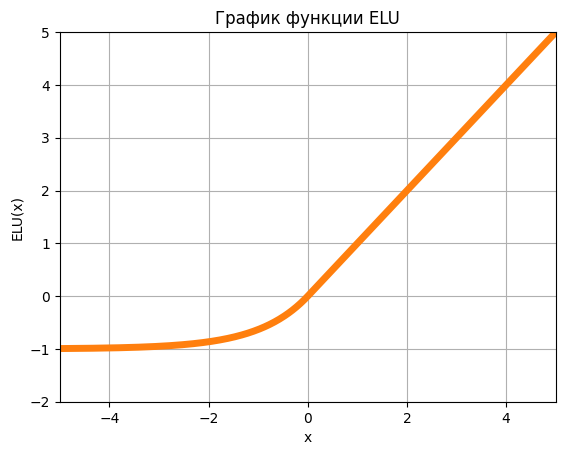

In [ ]:
inputs = torch.randn(4,3)
inputs

tensor([[ 0.1074, -0.9581,  0.7835],
        [ 0.1869, -1.0906,  0.5976],
        [ 0.8257,  1.6014, -0.2061],
        [ 0.6409,  1.5620, -0.0746]])

In [ ]:
class ELU:
  def __init__(self, alpha):
    # <создать атрибут объекта alpha>
    self.alpha = alpha

  def forward(self, inputs):
    ELU = torch.where(inputs < 0, self.alpha*(torch.exp(inputs) - 1), inputs)  # <реализовать логику ReLU>
    return ELU

In [ ]:
inputs = torch.randn(4, 3)
ELU(alpha=0.2).forward(inputs)

tensor([[ 0.4484, -0.1482,  0.2678],
        [ 0.2255, -0.1508, -0.0065],
        [-0.1455, -0.0513,  0.5848],
        [ 1.1681, -0.0301, -0.0289]])

## 2.3 Создание функции потерь

Функции потерь являются важной частью моделей машинного обучения. Эти функции показывают, **насколько сильно предсказанный моделью результат отличается от фактического.**

Они измеряют расхождение между предсказанными значениями модели и фактическими значениями.

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

**Среднеквадратичная ошибка (Mean Squared Error, MSE)** — это метрика оценки качества модели, которая измеряет среднюю сумму квадратов разницы между прогнозируемыми и фактическими значениями.

MSE часто используется в задачах регрессии, и его значением можно сравнивать разные модели или различные параметры модели. Чем меньше значение MSE, тем лучше модель.

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_pred - y_true.unsqueeze(-1))**2).mean().item() # <реализовать логику MSE>

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [ ]:
linear = Linear(n_features=inputs.shape[-1], n_neurons=1)
outputs = linear.forward(inputs)
MSELoss().forward(outputs, y)

8.7042236328125

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

**Функция потерь перекрестной энтропии** – это метрика, позволяющая оценить, насколько хорошо функционирует модель классификации в машинном обучении. Потеря (или ошибка) оценивается как число, находящееся между 0 и 1, где 0 – идеальная модель.

In [ ]:
import numpy as np

In [ ]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику CCE>
    return -1 * (y_true * torch.log(y_pred)).sum(1) #-(y_true.unsqueeze(-1) * y_pred.log()).sum(-1)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [ ]:
l = Linear(n_features=inputs.shape[-1], n_neurons = 3)
res = Softmax().forward(l.forward(inputs))

result = CategoricalCrossentropyLoss().forward(res, y)
result

tensor([14.8973, 20.0027, 13.2767])

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


**L2-регуляризация** (также известная как гребневая регуляризация или регуляризация Тихонова) - это метод регуляризации, используемый в машинном обучении для уменьшения переобучения модели.

Основная идея L2-регуляризации состоит в **добавлении дополнительного слагаемого к функции потерь модели**, которое штрафует большие значения весов модели. Это слагаемое вычисляется как сумма квадратов всех весов модели, умноженная на гиперпараметр λ (также называемый коэффициентом регуляризации). Чем больше значение λ, тем больше штраф за большие значения весов, что способствует уменьшению их влияния на предсказания модели.


In [ ]:
class MSELossL2:
  def __init__(self, lambda_):
    # <создать атрибут объекта alpha>
    self.lambda_ = lambda_

  def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
    return ((y_pred - y_true.unsqueeze(-1)) ** 2).sum()

  def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
    return (layer.weights ** 2).sum() * self.lambda_

  def forward(self, y_pred, y_true, layer):
    return self.data_loss(y_pred, y_true) + self.reg_loss(layer)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [ ]:
l = Linear(n_features=inputs.shape[-1], n_neurons=1)
outputs = linear.forward(inputs)
MSELossL2(lambda_=0.1).forward(y_pred=outputs, y_true=y, layer=linear)

tensor(40.6357)

## 2.4 Обратное распространение ошибки

**Обратное распространение ошибки (backpropagation)** - это алгоритм, используемый в обучении нейронных сетей для расчета градиента функции потерь по весам сети. Он основан на принципе цепного правила дифференцирования и позволяет эффективно обновлять веса нейронной сети, чтобы минимизировать ошибку предсказания модели.
Текст, выделенный полужирным шрифтом


2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

**SGD (стохастический градиентный спуск) в машинном обучении** - это оптимизационный алгоритм, используемый для обучения моделей машинного обучения. Он является итеративным методом для обновления параметров модели, основываясь на градиента функции потерь. Вместо того чтобы обрабатывать все тренировочные данные одновременно, SGD выбирает случайный поднабор данных (мини-пакет) на каждой итерации и применяет градиентный спуск. Это позволяет увеличить скорость обучения и эффективность обработки больших объемов данных. SGD может быть применен к различным моделям машинного обучения, включая линейную регрессию, логистическую регрессию и нейронные сети.

**Adam:** адаптивный метод оптимизации, который адаптирует скорость обучения на основе оценок первого и второго момента градиента.

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5) # Генерирует датасет для регрессии
X = torch.from_numpy(X).to(torch.float) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.from_numpy(y).to(torch.float) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

In [ ]:
coef

array([43.11199674, 64.57901563,  4.84439594, 38.00925384])

2.4.1.1 Реализуйте класс `SquaredLoss`


**Squared Loss (квадратичная ошибка)** – это функция потерь, используемая в задачах регрессии для оценки разницы между предсказанными значениями и истинными значениями целевой переменной.

Формула для вычисления квадратичной ошибки:
Squared Loss = (ypred - ytrue)^2


In [ ]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return  ((y_pred - y_true)**2).mean() # <реализовать логику MSE>

  def backward(self, y_pred, y_true): # производная
     self.dinput = 2*(y_pred-y_true) # (2/y_pred.size()[0])*[(y_pred - y_true)] # df/dc


#y_pred = torch.tensor([2, 3, 4])
# # y_true = torch.tensor([2, 2, 4.5])
# sql = SquaredLoss()
# sql.forward(y_pred, y_true)
# sql.backward(y_pred, y_true)

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.w = torch.randn(n_inputs) # вектор
    self.b = torch.randn(1) # скалярное значение

  def forward(self, inputs):
    self.inputs = inputs
    y = torch.dot(inputs, self.w) + self.b # внутреннее произведение двух тензоров одинаковой формы.
    return  y # <реализовать логику нейрона> умножение матрицы на вектор

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = self.inputs*dvalue# dE/dW
    self.dinput = self.w*dvalue # df/wX если больше 1 нейрона
    self.dbias = dvalue # df/db

In [ ]:
X.size()

torch.Size([100, 4])

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

**Стохастический градиентный спуск** (Stochastic Gradient Descent, SGD) - это оптимизационный алгоритм, используемый для обучения моделей машинного обучения. Он является вариантом классического градиентного спуска, но отличается тем, что обновления параметров модели происходят не после вычисления градиента на всем наборе данных, а после вычисления градиента на каждом отдельном примере из обучающей выборки.


Основная идея SGD состоит в том, чтобы в каждом шаге обновить параметры модели в направлении, противоположном градиенту функции потерь. Таким образом, шаги спуска будут малыми и позволят алгоритму инкрементально приближаться к минимуму функции потерь.


**Эпоха** - это один полный проход через обучающий набор данных алгоритмом машинного обучения. Во время одной эпохи модель обрабатывает все экземпляры в обучающем наборе и обновляет свои параметры на основе полученных результатов. Эпохи используются для оптимизации модели и повышения ее точности путем итеративного обновления параметров на каждом шаге эпохи. Продолжительность каждой эпохи может различаться в зависимости от размера обучающего набора и требуемой точности модели.

In [ ]:
n_inputs = X.size()[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
# обновление весов (эпохи как интерация)
for epoch in range(100):
  # Проход по всем тренировочным примерам
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop

    # <вызов методов backward>
    loss.backward(y_pred, y_example) # атрибут класса
    neuron.backward(loss.dinput)
    # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.w -= learning_rate*neuron.dweights
    neuron.b -= learning_rate*neuron.dbias

**Оптимизация весов нейрона** — это процесс настройки весовых коэффициентов связей между нейронами в нейронной сети. Он осуществляется с целью улучшения качества предсказаний или классификации модели.



Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return  ((y_pred.view(-1, 1) - y_true.view(-1, 1)) ** 2).mean() # <реализовать логику MSE> ((y_pred - y_true)**2).mean()

  def backward(self, y_pred, y_true):
    self.dinput = -2 *(y_true.view(-1, 1) - y_pred.view(-1, 1)) / y_true.shape[0]
    #self.dinput = 2*(y_pred - y_true) # df/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.w = torch.randn(n_inputs)
    self.b = torch.randn(1)

  def forward(self, inputs):
    self.inputs = inputs
    return torch.matmul(inputs, self.w) + self.b # умножение матриц
    # torch.dot(inputs, self.w)+self.b  # <реализовать логику нейрона>

  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dweights = self.inputs * dvalue # df/dW
    self.dbias = dvalue # df/db

In [ ]:
inputs

tensor([[ 1.0000,  2.0000,  3.0000,  2.5000],
        [ 2.0000,  5.0000, -1.0000,  2.0000],
        [-1.5000,  2.7000,  3.3000, -0.8000]])

2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = X.size()[1]# <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
    # forward pass
        y_pred = neuron.forward(x_example)# <прогон через нейрон>
        curr_loss = loss.forward(y_pred, y_example)# <прогон через функцию потерь>
        losses.append(curr_loss)

        # backprop
        # <вызов методов backward>
        loss.backward(y_pred, y_example) # атрибут класса
        neuron.backward(loss.dinput)
        # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.w -= learning_rate*neuron.dweights
        neuron.b -= learning_rate*neuron.dbias

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::200]

[tensor(8294.7275),
 tensor(3.6036),
 tensor(0.0064),
 tensor(1.4075e-05),
 tensor(7.7613e-08)]

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1) # создает одномерный тензор, содержащий равномерно распределенные значения в заданном интервале.
y = X.pow(2) + 0.2 * torch.rand(X.size())

inputs.clip(min=0) это функция в Python, которая применяется к массиву или итерируемому объекту inputs и гарантирует, что все его элементы будут не меньше нуля.

Если какой-либо элемент массива inputs меньше нуля, то функция clip() заменит его на ноль, сохраняя все остальные элементы без изменений. Если элемент равен или больше нуля, то она оставит его без изменений.


In [ ]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(1000000):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss
  y_pred = fc2.forward(relu1.forward(fc1.forward(X)))
  data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>


  if epoch % 100000 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(y_pred)

  # <backprop>
  # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)
  # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases
  # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 2.607083320617676
epoch 100000 mean loss 1.7549662590026855
epoch 200000 mean loss 1.2197035551071167
epoch 300000 mean loss 0.8719602227210999
epoch 400000 mean loss 0.6403389573097229
epoch 500000 mean loss 0.48530226945877075
epoch 600000 mean loss 0.3786512315273285
epoch 700000 mean loss 0.30306077003479004
epoch 800000 mean loss 0.24830323457717896
epoch 900000 mean loss 0.20694002509117126


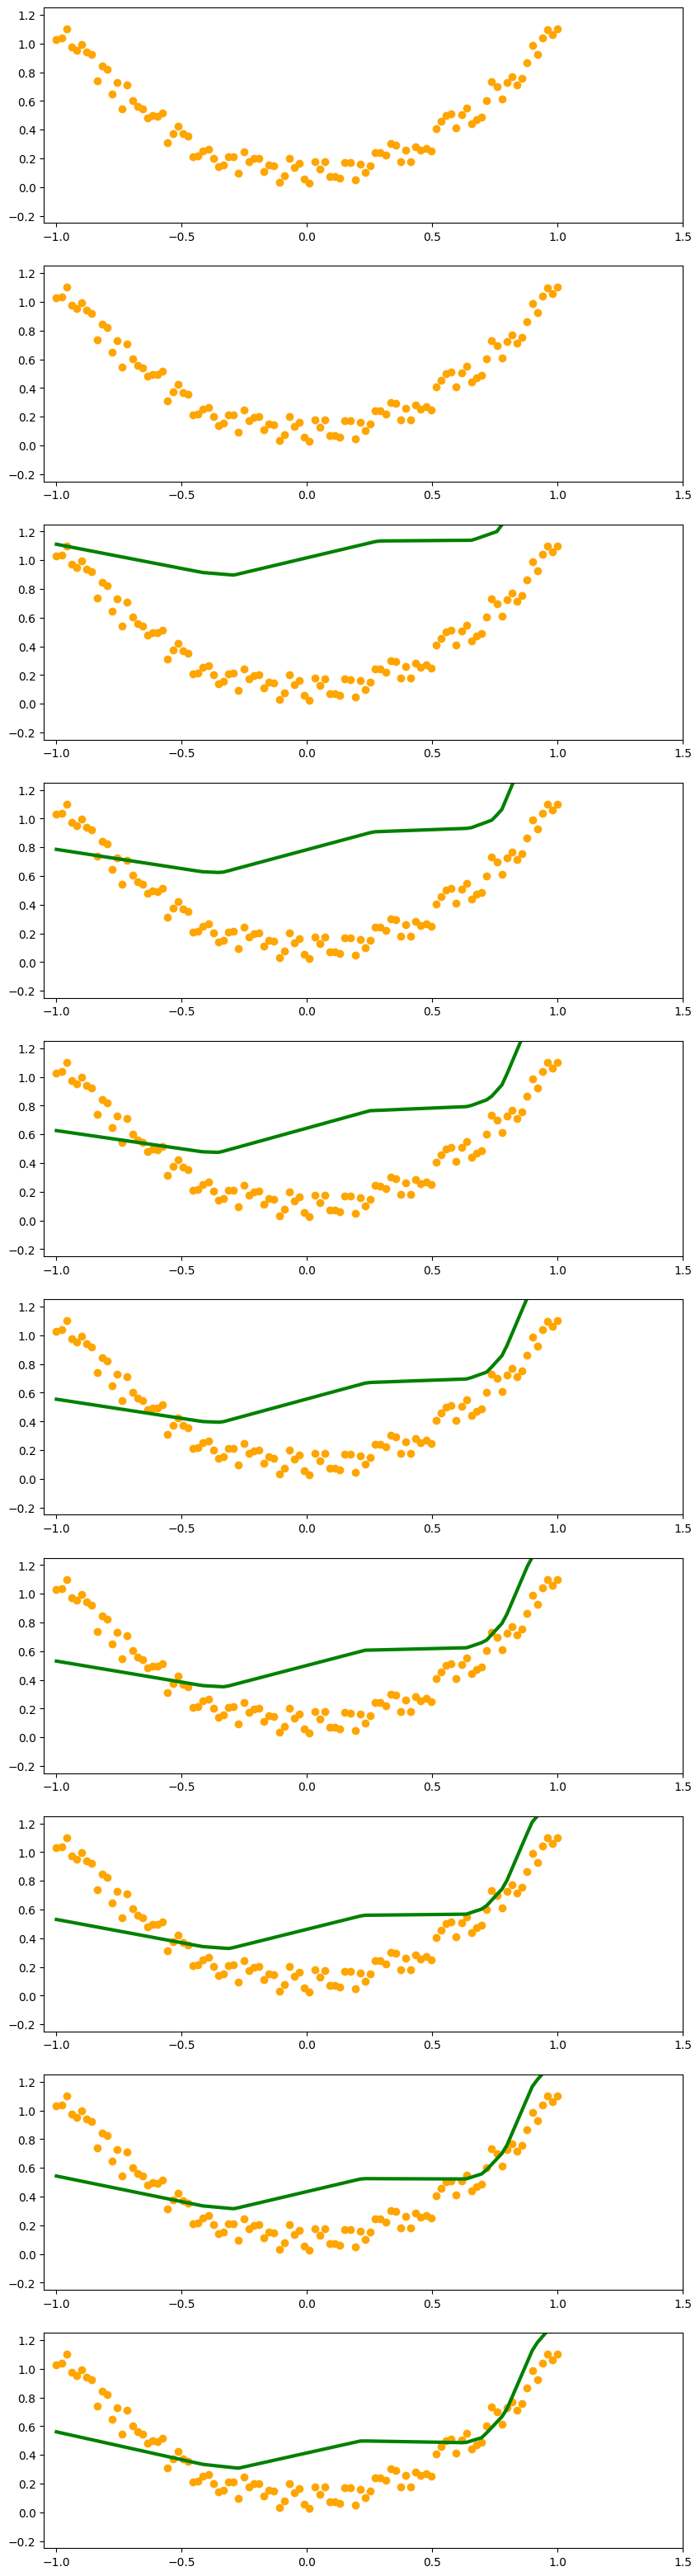

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)